### Business Questions

In this section, I designed 10 business questions based on the MyCarbonAI emissions dataset.  
Each question helps translate data into business insights, the same reasoning the app will later automate.

| # | Business Question | Why it Matters |
|---|--------------------|----------------|
| 1 | **What is the total CO₂ emitted by all companies combined?** | Defines the global KPI and the total impact that MyCarbonAI needs to track. |
| 2 | **Which sectors produce the highest emissions?** | Identifies where the biggest opportunities for carbon reduction are. |
| 3 | **How do emissions evolve over time (monthly trend 2024–2025)?** | Shows seasonality and real consumption behavior, separating growth from inefficiency. |
| 4 | **What are the top 3 emission sources across all companies?** | Reveals which activities have the biggest impact (electricity, transport, waste, etc.). |
| 5 | **What is the average CO₂ footprint per company?** | Creates benchmarks between companies and sectors. |
| 6 | **Which companies spend the most in relation to their emissions (Cost vs CO₂)?** | Connects financial and environmental performance, highlighting inefficiency. |
| 7 | **Which scope (1, 2, or 3) represents the highest share of total emissions?** | Clarifies whether problems are internal or come from the supply chain. |
| 8 | **Which city or location has the highest emissions intensity?** | Identifies geographic hotspots and possible pilot regions for decarbonization projects. |
| 9 | **Which companies have reduced or increased their emissions from 2024 to 2025?** | Measures progress and performance over time. |
| 10 | **What percentage of emissions comes from Scope 3 for each sector?** | Quantifies indirect impact and sets priorities for collaboration and innovation. |

These questions will guide the SQL analysis phase, where I will use queries to extract concrete answers  
and translate them into actionable insights for the MyCarbonAI dashboard.


In [ ]:
# === Basic setup ===

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# === Load dataset ===

df = pd.read_csv('../data/mycarbon_emissions.csv')

In [3]:
# === Preview ===

df.head()

,Company_ID,Company_Name,Sector,Location,Year,Month,Date,Source,Scope,Activity_Value,Activity_Unit,Emissions_kgCO2e,Cost_EUR
0,C001,Green Promenade Hotels,Hospitality,Lagos,2024,1,2024-01-01,Electricity,Scope 2,1212.29,kWh,69.46,275.81
1,C001,Green Promenade Hotels,Hospitality,Lagos,2024,1,2024-01-01,Transport-Diesel,Scope 1,512.50,km,149.80,184.79
2,C001,Green Promenade Hotels,Hospitality,Lagos,2024,1,2024-01-01,Transport-Gasoline,Scope 1,1028.37,km,140.33,395.36
3,C001,Green Promenade Hotels,Hospitality,Lagos,2024,1,2024-01-01,Heating-Gas,Scope 1,1364.06,m3,172.54,1233.74
4,C001,Green Promenade Hotels,Hospitality,Lagos,2024,1,2024-01-01,Waste,Scope 3,2.74,t,16.48,138.12


In [ ]:
# Check the size of the dataset
df.shape

(2520, 13)

In [ ]:
# Identify the typo if number, text, data...

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company_ID        2520 non-null   object 
 1   Company_Name      2520 non-null   object 
 2   Sector            2520 non-null   object 
 3   Location          2520 non-null   object 
 4   Year              2520 non-null   int64  
 5   Month             2520 non-null   int64  
 6   Date              2520 non-null   object 
 7   Source            2520 non-null   object 
 8   Scope             2520 non-null   object 
 9   Activity_Value    2520 non-null   float64
 10  Activity_Unit     2520 non-null   object 
 11  Emissions_kgCO2e  2520 non-null   float64
 12  Cost_EUR          2520 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 256.1+ KB


In [7]:
# Check for missing (NaN) values
df.isnull().sum()

Company_ID          0
Company_Name        0
Sector              0
Location            0
Year                0
Month               0
Date                0
Source              0
Scope               0
Activity_Value      0
Activity_Unit       0
Emissions_kgCO2e    0
Cost_EUR            0
dtype: int64

In [8]:
# Get basic statistics for numeric columns
df.describe()

,Year,Month,Activity_Value,Emissions_kgCO2e,Cost_EUR
count,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000
mean,2024.500000,6.500000,656.131234,127.904282,362.853333
std,0.500099,3.452738,816.125630,166.248290,295.480465
min,2024.000000,1.000000,0.000000,0.500000,0.000000
25%,2024.000000,3.750000,5.000000,22.067500,149.192500
50%,2024.500000,6.500000,360.610000,73.485000,293.270000
75%,2025.000000,9.250000,991.850000,173.015000,495.617500
max,2025.000000,12.000000,5830.480000,1727.720000,2182.770000


In [9]:
# Example: see all unique sectors
df['Sector'].unique()


array(['Hospitality', 'Leisure', 'Food & Beverage', 'Transport', 'Events',
       'Services', 'Retail', 'Mixed Use', 'Energy', 'Real Estate',
       'Health'], dtype=object)

In [10]:
# Convert Date column to datetime type
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes['Date']


dtype('<M8[ns]')

In [11]:
# Count unique companies, locations, and sources
num_companies = df['Company_Name'].nunique()
num_locations = df['Location'].nunique()
num_sources = df['Source'].nunique()

print("Companies:", num_companies)
print("Locations:", num_locations)
print("Sources:", num_sources)


Companies: 15
Locations: 4
Sources: 7


In [12]:
# Total emissions for all companies (in tonnes)
total_emissions_tonnes = df['Emissions_kgCO2e'].sum() / 1000
print("Total Emissions:", round(total_emissions_tonnes, 2), "tonnes of CO₂e")

Total Emissions: 322.32 tonnes of CO₂e


In [ ]:
# Total emissions for all companies (in tonnes
total_emissions_tonnes = df['Emissions_kgCO2e'].sum() / 1000
print("Total Emissions:", round(total_emissions_tonnes, 2), "tonnes of CO₂e")

Total Emissions: 322.32 tonnes of CO₂e


In [14]:
# Set up a simple visual style
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="viridis", font_scale=1.1)
plt.rcParams['figure.figsize'] = (10,5)

/opt/miniconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


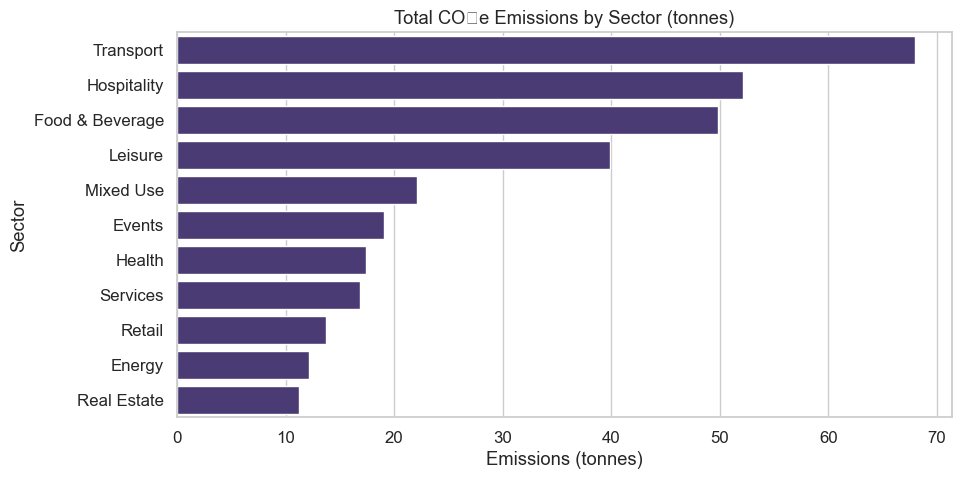

In [ ]:
# Total emissions (kg CO2e) by sector
emissions_by_sector = df.groupby('Sector')['Emissions_kgCO2e'].sum().sort_values(ascending=False)

sns.barplot(x=emissions_by_sector.values/1000, y=emissions_by_sector.index)
plt.title('Total CO₂e Emissions by Sector (tonnes)')
plt.xlabel('Emissions (tonnes)')
plt.ylabel('Sector')
plt.show()

# I wanted to see which sectors are responsible for the largest share of emissions.
# This helps me understand where the biggest potential for reduction lies.

/opt/miniconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


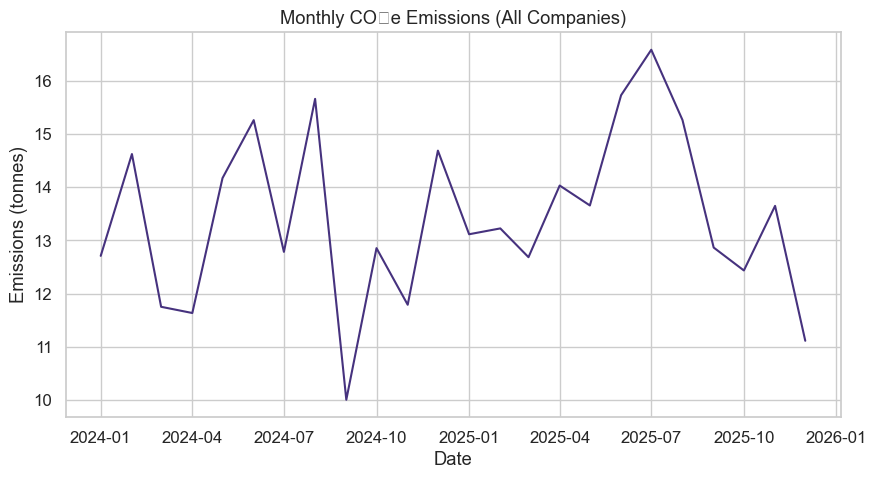

In [17]:
# Monthly emissions trend (all companies)
df_monthly = df.groupby('Date')['Emissions_kgCO2e'].sum()

sns.lineplot(x=df_monthly.index, y=df_monthly.values/1000)
plt.title('Monthly CO₂e Emissions (All Companies)')
plt.xlabel('Date')
plt.ylabel('Emissions (tonnes)')
plt.show()

# When the system learns seasonal patterns, it can distinguish between a real efficiency 
# improvement and just winter seasonality.

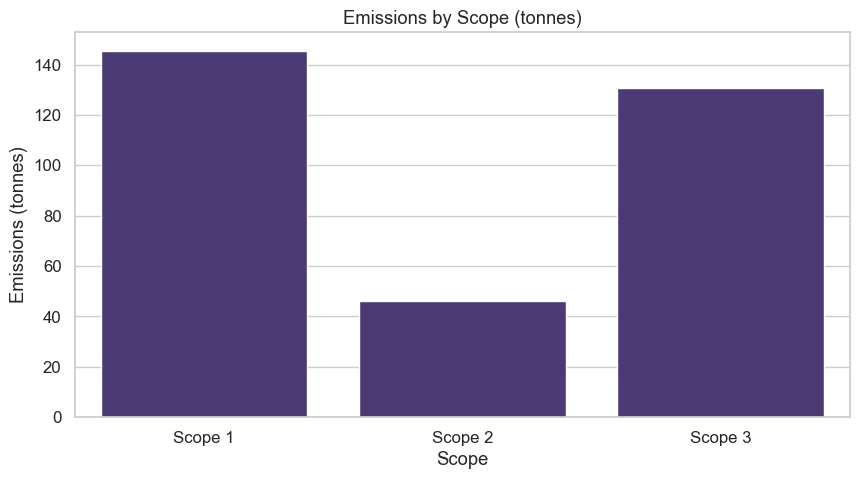

In [21]:
# Emissions by Scope
scope_summary = df.groupby('Scope')['Emissions_kgCO2e'].sum()

sns.barplot(x=scope_summary.index, y=scope_summary.values/1000)
plt.title('Emissions by Scope (tonnes)')
plt.xlabel('Scope')
plt.ylabel('Emissions (tonnes)')
plt.show()


#This visualization helps identify which scope dominates total emissions. 
# In real business terms, it shows whether the company’s main challenges are internal (scope 1) 
# or in their supply chain (scope 3).

/opt/miniconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


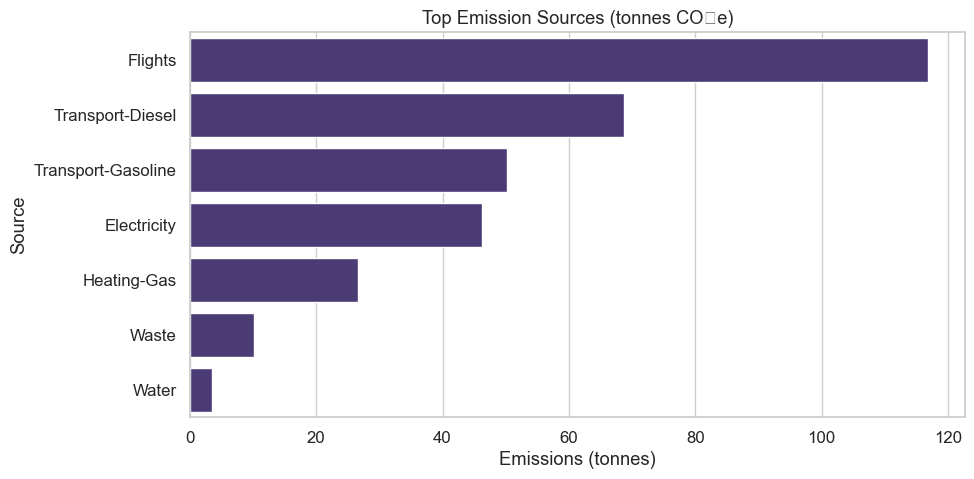

In [ ]:
# Emissions by source
source_summary = df.groupby('Source')['Emissions_kgCO2e'].sum().sort_values(ascending=False)

sns.barplot(x=source_summary.values/1000, y=source_summary.index)
plt.title('Top Emission Sources (tonnes CO₂e)')
plt.xlabel('Emissions (tonnes)')
plt.ylabel('Source')
plt.show()

# Electricity and transport stand out as the largest emission sources.
# This helps me focus recommendations where the impact will be most significant.

/opt/miniconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


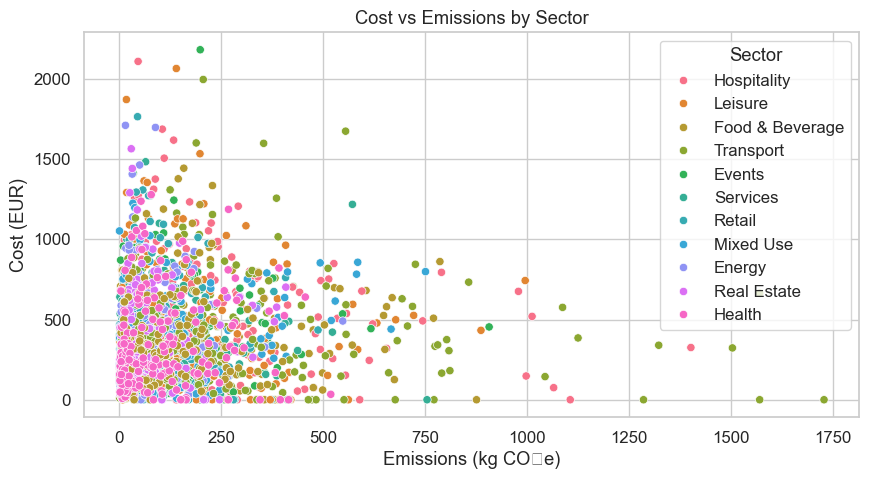

In [24]:
sns.scatterplot(data=df, x='Emissions_kgCO2e', y='Cost_EUR', hue='Sector')
plt.title('Cost vs Emissions by Sector')
plt.xlabel('Emissions (kg CO₂e)')
plt.ylabel('Cost (EUR)')
plt.show()


# This scatterplot shows the relationship between emissions and cost.
# It’s the kind of view decision-makers love — turning sustainability data into financial intelligence.

### Visual Exploration Summary

I explored emissions visually to identify main patterns.  
The data shows strong seasonality, high dependency on electricity and transport, and major opportunities in Scope 3.  
These insights will later connect to SQL queries and the first AI insights in the MyCarbonAI app.
